In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Pokémon Storytelling

Pokémon es una franquicia de medios que originalmente comenzó como un videojuego RPG, pero debido a su popularidad ha logrado expandirse a otros medios de entretenimiento como series de televisión, películas, juegos de cartas, ropa, entre otros, convirtiéndose en una marca que es reconocida en el mercado mundial. La misión en estos juegos es capturar y entrenar a los Pokémon, criaturas similares a lo que serian los animales en el mundo real, pero con diversos poderes. El nombre del juego proviene de la contracción de "Pocket Monster" (Monstruos de bolsillo).

En un principio, la propuesta de este trabajo consistía en utilizar el dataset [The Complete Pokemon Dataset](https://www.kaggle.com/datasets/rounakbanik/pokemon) para comprender el universo Pokémon original (es decir, el de los videojuegos), a modo de mero ejercicio, y como un primer aproximamiento al trabajo con datos. Para ello, se proponía proceder realizando un analisis exploratorio, con el fin de caracterizar exhaustivamente la composicion del universo pokemon. En el dataset contamos con información como ser la altura, el peso, el genero, el tipo principal y secundario. También contemplamos sus atributos en batalla, tal como puntos de vida (hp), puntos de ataque, de defensa, velocidad, etc.

No obstante, y a medida que se procedía con el analisis exploratorio del dataset, nos encontramos con que faltaba información clave, o bien se presentaban valores que, dado nuestro conocimiento previo del universo pokémon, eran imposibles (como ser el caso de pokémons que tenian el mismo tipo primario y secundario). Para solucionar esto extrajimos información de [PokeApi](https://pokeapi.co), para realizar un entrecruzamiento de datos, y corroborar asi la integridad de la información.

**Actualización:** Se encontraron 47 celdas de información faltante/incorrecta, la cual es una cantidad facil de corregir manualmente, por lo cual se procedió a realizar la investigación necesaria para completar el dataset.

Si bien originalmente se pensaba que este trabajo no permitiria avanzar con las practicas de Machine Learning, nos topamos con datasets tales como [Combat Pokemon Dataset for training](https://www.kaggle.com/datasets/israelsastre/combat-pokemon-dataset-for-training) o [Pokemon Battles](https://www.kaggle.com/code/jonathanbouchet/pokemon-battles). El objetivo propuesto en este trabajo, es mostrar la posibilidad de desarrollar un modelo que permita estimar el ganador ante un posible enfrentamiento.

La utilidad de dicho modelo es evidente: De arrojar buenos resultados, se podría utilizar el mismo para identificar que equipo resulta una "apuesta segura" al enfrentarse al juego, ya sea contra la computadora, o bien contra otros jugadores.

Dadas las limitaciones en las condiciones materiales asi como de presupuesto, se entiende que el modelo sería apenas un boceto. La cantidad de factores reales que intervienen en el desenlace de un combate es un claro obstaculo al desarrollo de este modelo. No obstante, se espera determinar a partir del mismo la viabilidad de invertir en el desarrollo de un modelo de este tipo a gran escala, el cual considere la mayor cantidad de aspectos relevantes posibles, tal como ser el nivel de los pokemon enfrentados, los ataques que cada uno de estos tienen, la tabla de ventajas segun el tipo, los diferentes objetos que se pueden utilizar y como afectan al combate segun el pokemon con el cual se este jugando, entre otros cientos, o quizas miles de detalles.

Glosario: 

* 1. Obteniendo la información
    - 1.1 Analizando la API
    - 1.2 Generación del DataFrame
    - 1.3 Proceso de limpieza de datos
    - 1.4 Correción manual de los datos
* 2. Analisis Exploratorio de Datos
    - 2.1 Descripción de las variables
    - 2.2 Analisis de las variables

# 1. Obteniendo la información

Vamos a obtener información, y generar un dataframe a partir de la api llamada PokeAPI.
La documentación de la misma (solo en ingles) se encuentra en https://pokeapi.co

In [ ]:
#Import de librerias y modulos
import requests
import pandas as pd
import json
import warnings 
warnings.simplefilter("ignore")

url = 'https://pokeapi.co/api/v2/pokemon?offset=0&limit=1154'
response = requests.get(url).json()

#Vamos a generar una tabla, donde tendremos dos columnas
#En la primera, los nombres de los pokemons, en la segunda
#En la segunda, la url de donde extraeremos su información
DF = pd.DataFrame(response['results'])

## 1.1 Analizando la API

Leyendo la documentación de la API descubrimos que la misma se encuentra, si no desorganizada, en un formato que no permite simplemente generar un dataframe a partir de la misma. Sera necesario identificar la ubicación de cada dato, para cada pokémon, para luego extraerla y generar un dataframe facil de leer e interpretar:

In [ ]:
#Obteniendo el .json del primer pokémon
urlaux = DF.loc[0][1]
responseaux = requests.get(urlaux).json()

#Imprimimos las Keys del diccionario
print(responseaux.keys())

#Imprimimos un separador, a modo de ayuda visual
print("""

    [----------]
    
    """)
    
#Imprimimos los valores de cada par del diccionario, de forma separada, para facilitar su lectura
for i in responseaux.keys():
    print(i)
    print(responseaux[i])
    
    #Nuevamente, imprimimos un separador 
    print("""
    [----------]
    """)

dict_keys(['abilities', 'base_experience', 'forms', 'game_indices', 'height', 'held_items', 'id', 'is_default', 'location_area_encounters', 'moves', 'name', 'order', 'past_types', 'species', 'sprites', 'stats', 'types', 'weight'])


    [----------]
    
    
abilities
[{'ability': {'name': 'overgrow', 'url': 'https://pokeapi.co/api/v2/ability/65/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'chlorophyll', 'url': 'https://pokeapi.co/api/v2/ability/34/'}, 'is_hidden': True, 'slot': 3}]

    [----------]
    
base_experience
64

    [----------]
    
forms
[{'name': 'bulbasaur', 'url': 'https://pokeapi.co/api/v2/pokemon-form/1/'}]

    [----------]
    
game_indices
[{'game_index': 153, 'version': {'name': 'red', 'url': 'https://pokeapi.co/api/v2/version/1/'}}, {'game_index': 153, 'version': {'name': 'blue', 'url': 'https://pokeapi.co/api/v2/version/2/'}}, {'game_index': 153, 'version': {'name': 'yellow', 'url': 'https://pokeapi.co/api/v2/version/3/'}}, {'game_index': 1, 'vers

  De esta primer url extraeremos la siguiente información: 
  - nombre
  - tipo1
  - tipo2
  - altura
  - peso
  - hp
  - ataque
  - defensa
  - ataque_esp
  - defensa_esp
  - velocidad

Como hemos podido observar, parte de la información se encuentra almacenada en una segunda url, vamos a observar la misma:

In [ ]:
#Segundo url/ analisis
varaux2 = responseaux['species']['url']
responseaux2 = requests.get(varaux2).json()
responseaux2

{'base_happiness': 50,
 'capture_rate': 45,
 'color': {'name': 'green',
  'url': 'https://pokeapi.co/api/v2/pokemon-color/5/'},
 'egg_groups': [{'name': 'monster',
   'url': 'https://pokeapi.co/api/v2/egg-group/1/'},
  {'name': 'plant', 'url': 'https://pokeapi.co/api/v2/egg-group/7/'}],
 'evolution_chain': {'url': 'https://pokeapi.co/api/v2/evolution-chain/1/'},
 'evolves_from_species': None,
 'flavor_text_entries': [{'flavor_text': 'A strange seed was\nplanted on its\nback at birth.\x0cThe plant sprouts\nand grows with\nthis POKéMON.',
   'language': {'name': 'en', 'url': 'https://pokeapi.co/api/v2/language/9/'},
   'version': {'name': 'red', 'url': 'https://pokeapi.co/api/v2/version/1/'}},
  {'flavor_text': 'A strange seed was\nplanted on its\nback at birth.\x0cThe plant sprouts\nand grows with\nthis POKéMON.',
   'language': {'name': 'en', 'url': 'https://pokeapi.co/api/v2/language/9/'},
   'version': {'name': 'blue', 'url': 'https://pokeapi.co/api/v2/version/2/'}},
  {'flavor_text'

Repetimos el proceso de obtención de Keys y posterior analisis del .json:

In [ ]:
#Obtencion de Keys
print(responseaux2.keys())

#Separador
print("""

    [----------]
    
    """)

#Imprimimos los valores de cada par del diccionario, de forma separada, para facilitar su lectura
for i in responseaux2.keys():
    print(i)
    print(responseaux2[i])
    
    #Separador
    print("""
    [----------]
    """)

dict_keys(['base_happiness', 'capture_rate', 'color', 'egg_groups', 'evolution_chain', 'evolves_from_species', 'flavor_text_entries', 'form_descriptions', 'forms_switchable', 'gender_rate', 'genera', 'generation', 'growth_rate', 'habitat', 'has_gender_differences', 'hatch_counter', 'id', 'is_baby', 'is_legendary', 'is_mythical', 'name', 'names', 'order', 'pal_park_encounters', 'pokedex_numbers', 'shape', 'varieties'])


    [----------]
    
    
base_happiness
50

    [----------]
    
capture_rate
45

    [----------]
    
color
{'name': 'green', 'url': 'https://pokeapi.co/api/v2/pokemon-color/5/'}

    [----------]
    
egg_groups
[{'name': 'monster', 'url': 'https://pokeapi.co/api/v2/egg-group/1/'}, {'name': 'plant', 'url': 'https://pokeapi.co/api/v2/egg-group/7/'}]

    [----------]
    
evolution_chain
{'url': 'https://pokeapi.co/api/v2/evolution-chain/1/'}

    [----------]
    
evolves_from_species
None

    [----------]
    
flavor_text_entries
[{'flavor_text': 'A strange seed

De esta segunda URL extraeremos la siguiente información:
- Numero id en el pokedex nacional
- Generación a la que pertenece
- Si es o no legendario
- Probabilidad de que un pokémon sea macho o hembra. La misma esta expresada de la siguiente forma:
  - -1: La especie pokémon en cuestión no tiene genero
  - 0: 100% de probabilidad de que sea macho
  - 1: 12,5% de probabilidad de que sea hembra
  - 2: 25% de probabilidad de que sea hembra
  - 3: 37,5% de probabilidad de que sea hembra
  - 4: 50% de probabilidad de que sea hembra
  - 5: 62,5% de probabilidad de que sea hembra
  - 6: 75% de probabilidad de que sea hembra
  - 7: 87,5% de probabilidad de que sea hembra
  - 8: 100% de probabilidad de que sea hembra
 

## 1.2 Generación del DataFrame

Habiendo observado e identificado la ubicación de cada dato requerido para el dataframe que vamos a construir, procedemos a automatizar la extracción de dichos datos.

El siguiente bloque de código se trabajó con el objetivo en mente de realizar la menor cantidad de llamados a la API posibles, tal y como los creadores de la misma lo solicitan en la documentación, dado que esto sería necesario para mantener los costos de la misma bajos, y por ende que la misma siga siendo de acceso público.

**Actualización:** Si eventualmente la notebook debiera ser reiniciada y ejecutada desde el comienzo, vamos a omitir la siguiente celda de codigo para ahorrarnos tiempo de trabajo, y valiendonos del archivo csv que hemos generado a partir del dataframe obtenido. En la celda inmediatamente posterior a esta, cargaremos dicho dataset.

In [ ]:
# #Scraper / Constructor del dataframe
# #Definimos las listas que usaremos para cada columna del dataframe
# nombre = []
# pokedex = []
# tipo1 = []
# tipo2 = []
# altura_m = []
# peso_kg = []
# hp = []
# ataque = []
# defensa = []
# ataque_esp = []
# defensa_esp = []
# velocidad = []
# generacion = []
# legendario = []
# genero = []

# #Definimos el tamaño del dataframe, 1154 es para todos los pokemon
# for i in range(1154):
    
#     #Obtenemos la primer url de cada pokemon
#     urlaux = DF.loc[i][1]
#     responseaux = requests.get(urlaux).json()
    
#     #Extraemos la informacion y la añadimos a las listas
#     nombre.append(responseaux['name'])

#     tipo1.append(responseaux['types'][0]['type']['name'])
    
#     #Dado que no todos los pokemon tienen 2do tipo, utilizamos un try/except para evitar in IndexError
#     try:
#         tipo2.append(responseaux['types'][1]['type']['name'])
#     except IndexError:
#         tipo2.append('No tiene')
    
#     #Los siguientes valores se dividen entre 10 puesto que estan expresados en decimetros y centigramos, respectivamente
#     altura_m.append(responseaux['height'] / 10)
#     peso_kg.append(responseaux['weight'] / 10)

#     hp.append(responseaux['stats'][0]['base_stat'])
#     ataque.append(responseaux['stats'][1]['base_stat'])
#     defensa.append(responseaux['stats'][2]['base_stat'])
#     ataque_esp.append(responseaux['stats'][3]['base_stat'])
#     defensa_esp.append(responseaux['stats'][4]['base_stat'])
#     velocidad.append(responseaux['stats'][5]['base_stat'])

#     #Obtenemos la segunda url de cada pokemon
#     varaux2 = responseaux['species']['url']
#     responseaux2 = requests.get(varaux2).json()
    
#     #Extraemos la informacion y la agregamos a las listas
#     generacion.append(responseaux2['generation']['name'])
#     legendario.append(responseaux2['is_legendary'])
#     genero.append(responseaux2['gender_rate'])
    
#     #Algunas entradas refieren a formas especiales de pokemons, y por ende no tienen numero de pokedex
#     if responseaux2['pokedex_numbers'][0]['pokedex']['name'] == 'national':
#         try:
#             pokedex.append(responseaux2['pokedex_numbers'][0]['entry_number'])
#         except IndexError:
#             pokedex.append('')
#     else:
#         pokedex.append('no tiene')

# #Con las listas terminadas generamos el dataframe
# pokemon_ds = pd.DataFrame(data={
#     'pokedex_id':pokedex,
#     'nombre':nombre,
#     'tipo1':tipo1,
#     'tipo2':tipo2,
#     'altura_m':altura_m,
#     'peso_kg':peso_kg,
#     'hp':hp,
#     'ataque':ataque,
#     'defensa':defensa,
#     'ataque_esp':ataque_esp,
#     'defensa_esp':defensa_esp,
#     'velocidad':velocidad,
#     'generacion':generacion,
#     'legendario':legendario,
#     'genero':genero})

In [ ]:
pokemon_ds = pd.read_csv('/content/drive/MyDrive/Data Science - Equipo: Zelada, Caceres M., Rodriguez S./Segunda Pre-Entrega/pokemon_csv.csv')

Procedemos a visualizar el dataframe, para corroborar que se haya generado correctamente

In [ ]:
#Por algun motivo, al cerrar la notebook y volver a abrirla se generan nuevas columnas llamadas "Unnamed".
#Vamos a intentar descubrir el motivo, pero mientras tanto, procederemos a eliminarlas manualmente cuando sea necesario
pokemon_ds.drop(['Unnamed: 0','Unnamed: 0.4',	'Unnamed: 0.3',	'Unnamed: 0.2',	'Unnamed: 0.1',	'Unnamed: 0.1.1'], axis = 1)

,pokedex_id,nombre,tipo1,tipo2,altura_m,peso_kg,hp,ataque,defensa,ataque_esp,defensa_esp,velocidad,generacion,legendario,genero
0,1,bulbasaur,grass,poison,0.7,6.9,45,49,49,65,65,45,generation-i,False,1
1,2,ivysaur,grass,poison,1.0,13.0,60,62,63,80,80,60,generation-i,False,1
2,3,venusaur,grass,poison,2.0,100.0,80,82,83,100,100,80,generation-i,False,1
3,4,charmander,fire,No tiene,0.6,8.5,39,52,43,60,50,65,generation-i,False,1
4,5,charmeleon,fire,No tiene,1.1,19.0,58,64,58,80,65,80,generation-i,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,483,dialga-origin,steel,dragon,7.0,848.7,100,100,120,150,120,90,generation-iv,True,-1
1150,484,palkia-origin,water,dragon,6.3,659.0,90,100,100,150,120,120,generation-iv,True,-1
1151,550,basculin-white-striped,water,No tiene,1.0,18.0,70,92,65,80,55,98,generation-v,False,4
1152,no tiene,basculegion-female,water,ghost,3.0,110.0,120,92,65,100,75,78,generation-viii,False,4


In [ ]:
#Establecemos los ajustes que nos permitiran visualizar el dataframe completo
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pokemon_ds

,Unnamed: 0,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0.1.1,pokedex_id,nombre,tipo1,tipo2,altura_m,peso_kg,hp,ataque,defensa,ataque_esp,defensa_esp,velocidad,generacion,legendario,genero
0,0,0,0,0,0,0,1,bulbasaur,grass,poison,0.7,6.9,45,49,49,65,65,45,generation-i,False,1
1,1,1,1,1,1,1,2,ivysaur,grass,poison,1.0,13.0,60,62,63,80,80,60,generation-i,False,1
2,2,2,2,2,2,2,3,venusaur,grass,poison,2.0,100.0,80,82,83,100,100,80,generation-i,False,1
3,3,3,3,3,3,3,4,charmander,fire,No tiene,0.6,8.5,39,52,43,60,50,65,generation-i,False,1
4,4,4,4,4,4,4,5,charmeleon,fire,No tiene,1.1,19.0,58,64,58,80,65,80,generation-i,False,1
5,5,5,5,5,5,5,6,charizard,fire,flying,1.7,90.5,78,84,78,109,85,100,generation-i,False,1
6,6,6,6,6,6,6,7,squirtle,water,No tiene,0.5,9.0,44,48,65,50,64,43,generation-i,False,1
7,7,7,7,7,7,7,8,wartortle,water,No tiene,1.0,22.5,59,63,80,65,80,58,generation-i,False,1
8,8,8,8,8,8,8,9,blastoise,water,No tiene,1.6,85.5,79,83,100,85,105,78,generation-i,False,1
9,9,9,9,9,9,9,10,caterpie,bug,No tiene,0.3,2.9,45,30,35,20,20,45,generation-i,False,4


En un primer vistazo al dataframe podemos observar que el numero del pokedex no se ha generado correctamente. Revisando la documentación de la API, y la API misma, observamos que se debe a errores en la base de datos. Lo complementaremos posteriormente obteniendo información de otras fuentes.
Por ultimo, guardaremos el dataframe en un archivo .csv, para poder acceder al mismo de forma local a futuro

In [ ]:
pokemon_ds.to_csv('pokemon_csv.csv')

## 1.3 Proceso de limpieza de datos

### Nulos - Duplicados

In [ ]:
pokemon_ds.isnull().sum()

Unnamed: 0        0
Unnamed: 0.4      0
Unnamed: 0.3      0
Unnamed: 0.2      0
Unnamed: 0.1      0
Unnamed: 0.1.1    0
pokedex_id        0
nombre            0
tipo1             0
tipo2             0
altura_m          0
peso_kg           0
hp                0
ataque            0
defensa           0
ataque_esp        0
defensa_esp       0
velocidad         0
generacion        0
legendario        0
genero            0
dtype: int64

In [ ]:
pokemon_ds.duplicated().sum()

0

Como pudimos observar, el dataframe no posee datos nulos ni duplicados. Procedemos a conectar con una segunda base de datos, con el objetivo de corroborar de una segunda fuente la adecuación de los datos:

### Conexión de un segundo Dataset:

In [ ]:
#Cargamos el dataset
dataset = pd.read_csv('/content/drive/MyDrive/Data Science - Equipo: Zelada, Caceres M., Rodriguez S./Segunda Pre-Entrega/pokemon.csv')

#Cambiamos el orden de algunas columnas para mayor legibilidad
first_column = dataset.pop('name') 
dataset.insert(0, 'name', first_column)

#Establecemos la columna "pokedex_number" como indice
dataset.set_index('pokedex_number', inplace = True)

In [ ]:
#Cargamos las primeras entradas
dataset.head()

,name,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,percentage_male,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
pokedex_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,88.1,65,65,45,grass,poison,6.9,1,0
2,Ivysaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,88.1,80,80,60,grass,poison,13.0,1,0
3,Venusaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,88.1,122,120,80,grass,poison,100.0,1,0
4,Charmander,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,88.1,60,50,65,fire,NaN,8.5,1,0
5,Charmeleon,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,88.1,80,65,80,fire,NaN,19.0,1,0


Nuestro segundo dataset contiene muchas columnas con información que, en principio, no nos sirve para revisar la integridad y correctitud de los datos del primer dataset. Procedemos a eliminar dichas columnas, y luego a reordenar las restantes para facilitar su lectura: 

In [ ]:
#Eliminamos las columnas sobrantes
dataset.pop('against_bug')
dataset.pop('against_dark')
dataset.pop('against_dragon')
dataset.pop('against_electric')
dataset.pop('against_fairy')
dataset.pop('against_fight')
dataset.pop('against_fire')
dataset.pop('against_flying')
dataset.pop('against_ghost')
dataset.pop('against_grass')
dataset.pop('against_ground')
dataset.pop('against_ice')
dataset.pop('against_normal')
dataset.pop('against_poison')
dataset.pop('against_psychic')
dataset.pop('against_rock')
dataset.pop('against_steel')
dataset.pop('against_water')
dataset.pop('japanese_name')
dataset.pop('experience_growth')
dataset.pop('base_egg_steps')
dataset.pop('base_happiness')
dataset.pop('base_total')
dataset.pop('capture_rate')
dataset.pop('classfication')
dataset.pop('abilities')

#Reordenamos las columnas
aux_column = dataset.pop('type1') 
dataset.insert(1, 'type1', aux_column)
aux_column = dataset.pop('type2') 
dataset.insert(2, 'type2', aux_column)
aux_column = dataset.pop('height_m') 
dataset.insert(3, 'height_m', aux_column)
aux_column = dataset.pop('weight_kg') 
dataset.insert(4, 'weight_kg', aux_column)
aux_column = dataset.pop('hp') 
dataset.insert(5, 'hp', aux_column)
aux_column = dataset.pop('percentage_male') 
dataset.insert(13, 'percentage_male', aux_column)

In [ ]:
dataset.rename({'pokedex_number':'pokedex_id'}, inplace=True)

### Entradas vacias

In [ ]:
dataset.isnull().sum() 

name                 0
type1                0
type2              384
height_m            20
weight_kg           20
hp                   0
attack               0
defense              0
sp_attack            0
sp_defense           0
speed                0
generation           0
is_legendary         0
percentage_male     98
dtype: int64

Efectivamente nuestro dataset de control posee entradas vacias.
En el caso de la columna "type 2", sabemos que no es en principio un problema, pues no todos los pokémon tienen tipo secundario. Procedemos a rellenar esas filas con la cadena de texto "no tiene".
En el caso del peso y la altura, dichas entradas vacias son evidentemente un error. Dado que son apenas 20 entradas faltantes, vamos a proceder a completar manualmente dicha información.
En el caso de la columna "percentage_male", no es, en principio, un problema, puesto que puede ser que para una especie pokemon no existan ejemplares machos. Vamos a comparar dichas entradas con las correspondientes en el primer dataset. En el caso de que todas se correspondan con especies pokemon de este estilo, vamos a asumir que los datos son correctos. En caso contrario, intentaremos corregirlo de la forma que consideremos adecuada.
Por ultimo, deberemos estandarizar el formato de las columnas de ambos dataframes, para facilitar la comparacion de las mismas.

### Completando manualmente las entradas vacias:

In [ ]:
dataset[dataset.height_m.isnull()]

,name,type1,type2,height_m,weight_kg,hp,attack,defense,sp_attack,sp_defense,speed,generation,is_legendary,percentage_male
pokedex_number,,,,,,,,,,,,,,
19,Rattata,normal,dark,NaN,NaN,30,56,35,25,35,72,1,0,50.0
20,Raticate,normal,dark,NaN,NaN,75,71,70,40,80,77,1,0,50.0
26,Raichu,electric,electric,NaN,NaN,60,85,50,95,85,110,1,0,50.0
27,Sandshrew,ground,ice,NaN,NaN,50,75,90,10,35,40,1,0,50.0
28,Sandslash,ground,ice,NaN,NaN,75,100,120,25,65,65,1,0,50.0
37,Vulpix,fire,ice,NaN,NaN,38,41,40,50,65,65,1,0,24.6
38,Ninetales,fire,ice,NaN,NaN,73,67,75,81,100,109,1,0,24.6
50,Diglett,ground,ground,NaN,NaN,10,55,30,35,45,90,1,0,50.0
51,Dugtrio,ground,ground,NaN,NaN,35,100,60,50,70,110,1,0,50.0


Curiosamente, los 20 pokémon sin información de peso son los mismos que no tienen información de altura.

In [ ]:
#Utilizaremos el pokedex_number
#Rattata
dataset.at[19, 'height_m'] = 0.3
dataset.at[19, 'weight_kg'] = 3.5
                  
#Raticate
dataset.at[20, 'height_m'] = 0.7
dataset.at[20, 'weight_kg'] = 18.5
                  
#Raichu
dataset.at[26, 'height_m'] = 0.8
dataset.at[26, 'weight_kg'] = 30.0
                  
#Sandshrew
dataset.at[27, 'height_m'] = 0.6
dataset.at[27, 'weight_kg'] = 12.0
                  
#Sandslash
dataset.at[28, 'height_m'] = 1.0
dataset.at[28, 'weight_kg'] = 29.5
                  
#Vulpix
dataset.at[37, 'height_m'] = 0.6
dataset.at[37, 'weight_kg'] = 9.9

#Ninetales
dataset.at[38, 'height_m'] = 1.1
dataset.at[38, 'weight_kg'] = 19.9
                  
#Diglett
dataset.at[50, 'height_m'] = 0.2
dataset.at[50, 'weight_kg'] = 0.8

#Dugtrio
dataset.at[51, 'height_m'] = 0.7
dataset.at[51, 'weight_kg'] = 33.3
                  
#Meowth
dataset.at[52, 'height_m'] = 0.4
dataset.at[52, 'weight_kg'] = 4.2
                  
#Persian
dataset.at[53, 'height_m'] = 1.0
dataset.at[53, 'weight_kg'] = 32.0
                  
#Geodude
dataset.at[74, 'height_m'] = 0.4
dataset.at[74, 'weight_kg'] = 20.0
                  
#Graveler
dataset.at[75, 'height_m'] = 1.0
dataset.at[75, 'weight_kg'] = 105.0
                  
#Golem
dataset.at[76, 'height_m'] = 1.4
dataset.at[76, 'weight_kg'] = 300.0

#Grimer
dataset.at[88, 'height_m'] = 0.9
dataset.at[88, 'weight_kg'] = 30.0
                  
#Muk
dataset.at[89, 'height_m'] = 1.2
dataset.at[89, 'weight_kg'] = 30.0
                  
#Exeggutor
dataset.at[103, 'height_m'] = 2.0
dataset.at[103, 'weight_kg'] = 120.0
                  
#Marowak
dataset.at[105, 'height_m'] = 1.0
dataset.at[105, 'weight_kg'] = 45.0
                  
#Hoopa
dataset.at[720, 'height_m'] = 0.5
dataset.at[720, 'weight_kg'] = 9.0
                  
#Lycanroc
dataset.at[745, 'height_m'] = 0.8
dataset.at[745, 'weight_kg'] = 25.0

Revisamos nuevamente, para corroborar que ya no tengamos entradas vacias en la columna peso y altura:

In [ ]:
dataset.isnull().sum()

name                 0
type1                0
type2              384
height_m             0
weight_kg            0
hp                   0
attack               0
defense              0
sp_attack            0
sp_defense           0
speed                0
generation           0
is_legendary         0
percentage_male     98
dtype: int64

Ademas, hemos observado que luego de la fila 900, aproximadamente, las entradas corresponden a formas especiales de pokemons anteriores. Vamos a eliminar esas entradas, mas aquellas para las cuales no tengamos datos de control en el segundo dataset

In [ ]:
print('Largo del dataframe obtenido desde la api: ', len(pokemon_ds.index))
print('Largo del dataframe obtenido desde csv: ', len(dataset.index))

Largo del dataframe obtenido desde la api:  1154
Largo del dataframe obtenido desde csv:  801


Como podemos ver, esto incluye todas las entradas luego de la numero 801, procedemos a realizar estas acciones:

In [ ]:
#Completamos las entradas vacias en "type2" con la cadena de texto "no tiene"
dataset.type2.fillna('No tiene', inplace=True)

# Transformamos las columnas 'generacion' y 'legendario' de nuestro primer dataframe a valores numericos
pokemon_ds.generacion.replace('generation-i', 1, inplace = True)
pokemon_ds.generacion.replace('generation-ii', 2, inplace = True)
pokemon_ds.generacion.replace('generation-iii', 3, inplace = True)
pokemon_ds.generacion.replace('generation-iv', 4, inplace = True)
pokemon_ds.generacion.replace('generation-v', 5, inplace = True)
pokemon_ds.generacion.replace('generation-vi', 6, inplace = True)
pokemon_ds.generacion.replace('generation-vii', 7, inplace = True)
pokemon_ds.generacion.replace('generation-viii', 8, inplace = True)

pokemon_ds.legendario.replace(True, 1, inplace = True)
pokemon_ds.legendario.replace(False, 0, inplace = True)

pokemon_ds.drop(range(801,1154), axis=0, inplace=True)
# pokemon_ds.set_index('pokedex_id', inplace=True)
pokemon_ds.head()

,Unnamed: 0,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0.1.1,pokedex_id,nombre,tipo1,tipo2,altura_m,peso_kg,hp,ataque,defensa,ataque_esp,defensa_esp,velocidad,generacion,legendario,genero
0,0,0,0,0,0,0,1,bulbasaur,grass,poison,0.7,6.9,45,49,49,65,65,45,1,0,1
1,1,1,1,1,1,1,2,ivysaur,grass,poison,1.0,13.0,60,62,63,80,80,60,1,0,1
2,2,2,2,2,2,2,3,venusaur,grass,poison,2.0,100.0,80,82,83,100,100,80,1,0,1
3,3,3,3,3,3,3,4,charmander,fire,No tiene,0.6,8.5,39,52,43,60,50,65,1,0,1
4,4,4,4,4,4,4,5,charmeleon,fire,No tiene,1.1,19.0,58,64,58,80,65,80,1,0,1


In [ ]:
print('Largo del dataframe obtenido desde la api: ', len(pokemon_ds.index))
print('Largo del dataframe obtenido desde csv: ', len(dataset.index))

Largo del dataframe obtenido desde la api:  801
Largo del dataframe obtenido desde csv:  801


### Tipo secundario

Otro error que hemos notado, es que algunas especies pokémon tienen el mismo tipo primario y secundario. Dado nuestro conocimiento previo del universo pokémon, y el funcionamiento de los tipos, sabemos que esto no puede ser. Vamos a identificar dichos casos y cambiar el tipo secundario por el valor "No tiene":

In [ ]:
auxvar = dataset[dataset.type2 == dataset.type1].index.values.tolist()

for i in auxvar:
    dataset.type2[i] = 'No tiene'

### Inconsistencia en la columna de genero

Por ultimo, hemos notado que la columna "percentage_male" se nos presenta un problema. En las primeras entradas encontramos un valor de 88.1% de probabilidades de que el pokemon sea macho, sin embargo este valor no se corresponde con el analisis que hicimos de la columna "genero" de nuestro primer dataframe. Logicamente, la probabilidad de que un pokemon sea macho, y la probabilidad de que un pokemon sea hembra, deberia sumar 100%, puesto que no hay una tercera opcion.
Tras una breve investigación en internet, concluimos que los unicos posibles valores son los indicados en el analisis del primer dataframe. Revisamos los valores contenidos en la columna "percentage_male":

In [ ]:
dataset['percentage_male'].unique()

array([ 88.1,  50. ,   0. , 100. ,  24.6,  75.4,   nan,  11.2])

Tal como dijimos recien, tras revisar documentación sobre el mundo pokémon, concluimos que los valores 88.1, 24.6, 75.4, y 11.2 no son correctos. Procederemos a eliminar la columna, ya que no nos sirve para control.

Luego, y dado que ahora que ambos dataframe tienen el mismo largo, procedemos a compararlos

In [ ]:
dataset.drop('percentage_male', axis=1, inplace=True)

In [ ]:
pokemon_ds.altura_m[1]

1.0

In [ ]:
ds_control = pd.DataFrame(data={
    'pokedex_id':pokemon_ds.index,
    'nombre':pokemon_ds.nombre})

ds_control.set_index('pokedex_id', inplace=True)

In [ ]:
ds_control['altura control'] = [pokemon_ds.altura_m[i] == dataset.height_m[i+1] for i in range(len(pokemon_ds.altura_m))]
ds_control['peso control'] = [pokemon_ds.peso_kg[i] == dataset.weight_kg[i+1] for i in range(len(pokemon_ds.altura_m))]
ds_control['generacion control'] = [pokemon_ds.generacion[i] == dataset.generation[i+1] for i in range(len(pokemon_ds.altura_m))]
ds_control['legendario control'] = [pokemon_ds.legendario[i] == dataset.is_legendary[i+1] for i in range(len(pokemon_ds.altura_m))]
ds_control['tipo 1 control'] = [pokemon_ds.tipo1[i] == dataset.type1[i+1] for i in range(len(pokemon_ds.altura_m))]
ds_control['tipo 2 control'] = [pokemon_ds.tipo2[i] == dataset.type2[i+1] for i in range(len(pokemon_ds.altura_m))]
ds_control

,nombre,altura control,peso control,generacion control,legendario control,tipo 1 control,tipo 2 control
pokedex_id,,,,,,,
0,bulbasaur,True,True,True,True,True,True
1,ivysaur,True,True,True,True,True,True
2,venusaur,True,True,True,True,True,True
3,charmander,True,True,True,True,True,True
4,charmeleon,True,True,True,True,True,True
5,charizard,True,True,True,True,True,True
6,squirtle,True,True,True,True,True,True
7,wartortle,True,True,True,True,True,True
8,blastoise,True,True,True,True,True,True


In [ ]:
inconsistencias = 0

for i in range(len(ds_control.nombre)):
    if ds_control['altura control'][i] == False or ds_control['peso control'][i] == False or ds_control['generacion control'][i] == False or ds_control['legendario control'][i] == False or ds_control['tipo 1 control'][i] == False or ds_control['tipo 2 control'][i] == False:
        inconsistencias = inconsistencias + 1
    
print('Hay', inconsistencias, 'filas con inconsistencias')

Hay 36 filas con inconsistencias


Como podemos observar, solo hay 36 filas con inconsistencias, lo cual es, en principio, una cantidad manejable de datos. Podemos proceder revisando la informacion de estas 36 filas, para corregir manualmente los datos, de ser necesario, y posteriormente continuar con el analisis exploratorio de los mismos.
A continuacion, identificamos las 36 filas con inconsistencias

In [ ]:
df_aux = ds_control
df_aux.replace(True, 1, inplace=True)
df_aux.replace(False, 0, inplace=True)

ds_control['consistencias'] = (ds_control['altura control']+ds_control['peso control']
                                 +ds_control['generacion control']+ds_control['legendario control']
                                 +ds_control['tipo 1 control']+ds_control['tipo 2 control'])

df_mask= ds_control['consistencias']!=6
filtered_df = ds_control[df_mask]
filtered_df

,nombre,altura control,peso control,generacion control,legendario control,tipo 1 control,tipo 2 control,consistencias
pokedex_id,,,,,,,,
18,rattata,1,1,1,1,1,0,5
19,raticate,1,1,1,1,1,0,5
26,sandshrew,1,1,1,1,1,0,5
27,sandslash,1,1,1,1,1,0,5
36,vulpix,1,1,1,1,1,0,5
37,ninetales,1,1,1,1,1,0,5
51,meowth,1,1,1,1,1,0,5
52,persian,1,1,1,1,1,0,5
104,marowak,1,1,1,1,1,0,5


## 1.4 Corrección manual de los datos

Respecto de los siguientes pokemon, al menos un dato es incorrecto, procederemos a investigar al respecto y corregirlo manualmente:

In [ ]:
 pokemon_ds[df_mask]

,Unnamed: 0,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0.1.1,pokedex_id,nombre,tipo1,tipo2,altura_m,peso_kg,hp,ataque,defensa,ataque_esp,defensa_esp,velocidad,generacion,legendario,genero
18,18,18,18,18,18,18,19,rattata,normal,No tiene,0.3,3.5,30,56,35,25,35,72,1,0,4
19,19,19,19,19,19,19,20,raticate,normal,No tiene,0.7,18.5,55,81,60,50,70,97,1,0,4
26,26,26,26,26,26,26,27,sandshrew,ground,No tiene,0.6,12.0,50,75,85,20,30,40,1,0,4
27,27,27,27,27,27,27,28,sandslash,ground,No tiene,1.0,29.5,75,100,110,45,55,65,1,0,4
36,36,36,36,36,36,36,37,vulpix,fire,No tiene,0.6,9.9,38,41,40,50,65,65,1,0,6
37,37,37,37,37,37,37,38,ninetales,fire,No tiene,1.1,19.9,73,76,75,81,100,100,1,0,6
51,51,51,51,51,51,51,52,meowth,normal,No tiene,0.4,4.2,40,45,35,40,40,90,1,0,4
52,52,52,52,52,52,52,53,persian,normal,No tiene,1.0,32.0,65,70,60,65,65,115,1,0,4
104,104,104,104,104,104,104,105,marowak,ground,No tiene,1.0,45.0,60,80,110,50,80,45,1,0,4
150,150,150,150,150,150,150,151,mew,psychic,No tiene,0.4,4.0,100,100,100,100,100,100,1,0,-1


# 2. Analisis Exploratorio de Datos

El universo pokémon se ha ido ampliando consecutivamente. La introducción de nuevos mapas en los videojuegos exigió la incorporación de nuevas especies pokémon. 

En este trabajo se pretende determinar a partir de los datos, patrones generales y medidas "tipicas" dentro del universo pokémon. Ya que en cada generación se introducen nuevas especies al universo pokémon, un conocimiento mas a fondo de dicho universo permitiría abordar diversos proyectos, tal como diseñar nuevos pokémons que no resulten incoherentes con el universo ya desarrollado.

Se parte de un DataFrame generado a partir de una Api, el cual se corroboro entrecruzando informacion con un dataset en formato .csv

Se propone dar respuesta a las preguntas expuestas en el siguiente apartado, a partir del tratamiento de los datos proporcionados. Este analisis, asi como las respuestas a dichas preguntas, se acompañaran con visualizaciones y serán respaldadas por valores numericos con sus correspondientes interpretaciones. 

Se realizarán análisis y construiran visualizaciones de los datos para identificar patrones en el conjunto de datos. Luego se buscara dar una respuesta fundamentada (si es posible) a las siguientes cuestiones (o grupos de preguntas):

* ¿Cuantos pokémons fueron introducidos por generación?¿Cuantos pokémons nuevos podrían ser introducidos de forma coherente? 
* ¿Existe algun tipo/combinacion de tipos en el cual resulte conveniente/necesario enfocarse?¿Por que motivo?
* ¿Respecto del peso y la altura, hay alguna tendencia general?¿Podemos establecer un limite que nos permita diferenciar entre "tipicos" y "atipicos"?¿Cual es su distribución numérica?¿Guarda alguna relación con si son "legendarios" o no?
* ¿Cuantos pokémon legendarios suelen ser introducidos por generación?
* ¿Hay alguna relación entre el peso, tamaño, tipos, y los diferentes atributos de batalla? De ser asi, ¿Cual es?

Luego, en el apartado siguiente se abordara la posibilidad de construcción de un modelo de inteligencia artificial

## 2.1 Descripción de las variables

Nuestro dataset esta conformado por 13 columnas, a continuación explicamos que información se presenta en cada una de ellas:

* **name:** El nombre (utilizado internacionalmente, excepto en japon) del pokémon
* **type1:** La naturaleza principal de los ataques del pokemon. Se utiliza para calcular ventajas y desventajas sobre otros pokemons
* **type2:** La naturaleza secundaria de los ataques del pokemon. Se suele obtener al evolucionar, y no todas las especies poseen una
* **height_m:** La altura, expresada en metros
* **weight_kg:** El peso, expresado en kilogramos
* **generation:** La generación en la cual fue introducido el pokemon. Cada generación se corresponde con un conjunto de entregas donde el mapa era ampliado respecto de la generación anterior.
* **is_legendary:**	Los pokemon legendarios son escasos, dificiles de encontrar, y generalmente se los asocia con un poder fuera de lo comun. 
* **percentage_male:** Refiere a la probabilidad de que un pokemon sea de genero macho al generarse. Esta expresado tal cual como se explico en el apartado 1.1

En las siguientes columnas se enlistan las estadisticas "base" del pokemon. Las mismas son modificadas de forma permanente al subir de nivel, asi como pueden ser modificadas temporalmente al utilizar diversos objetos:
* **hp:** Los puntos de vida. Durante el combate los puntos bajan con cada ataque recibido, y pueden ser regenerados de diversas formas. Al llegar a cero, el pokemon queda fuera de combate.
* **attack:** Los puntos base para ataques normales
* **defense:** Los puntos base de defensa contra ataques normales
* **sp_attack:** Los puntos base para ataques especiales
* **sp_defense:** Los puntos base de defensa contra ataques especiales
* **speed:** La velocidad. Se utiliza principalmente para determinar que pokemon ataca primero,

## 2.2 Analisis de variables

### Analisis univariado

A continuación analizaremos la distribución de pokemons segun la generación, el tipo principal y secundario, asi como el genero:

**Distribución por generación:**

<Figure size 1080x720 with 0 Axes>

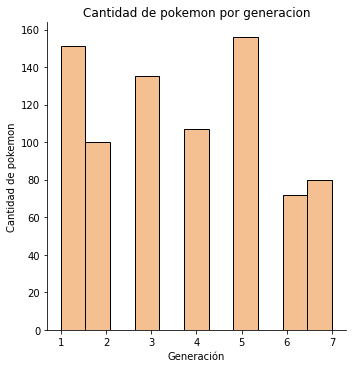

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
sns.displot(pokemon_ds['generacion'], color='#F2AB6D', kde=False)
plt.ylabel('Cantidad de pokemon')
plt.xlabel('Generación')
plt.title('Cantidad de pokemon por generacion')
plt.show()

 La cantidad de pokémon introducidos por generación oscila entre 72 y 151. Los valores maximos y minimos no se alejan demasiado del promedio.
Respecto de la pregunta **¿Cuantos pokémon nuevos podrían ser introducidos de forma coherente en una nueva generación?**, la respuesta dependerá del objetivo detras de la nueva generación: 
Si la nueva región debe guardar semejanza con las anteriores, entonces la cantidad de pokémon deberá acercarse a 114(±30)
Si, en cambio, se pretende lograr el efecto opuesto (como podría ser el agregar una región sumamente extensa, o bien una pequeña actualización en la cual se incorpora una pequeña isla con pocos ejemplares nuevos) entonces se deberán considerar mas de 151, o menos de 72, respectivamente.

**Distribución por tipo (principal):**

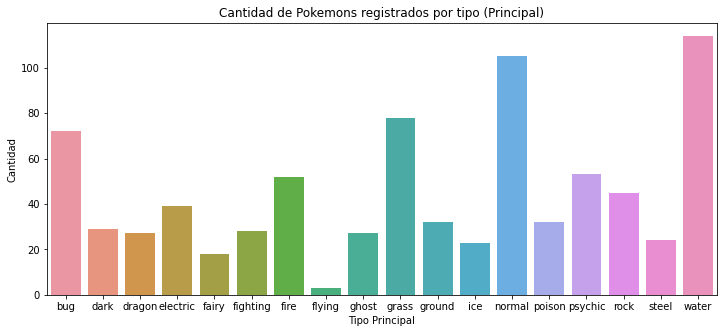

tipo1
bug          72
dark         29
dragon       27
electric     39
fairy        18
fighting     28
fire         52
flying        3
ghost        27
grass        78
ground       32
ice          23
normal      105
poison       32
psychic      53
rock         45
steel        24
water       114
Name: tipo1, dtype: int64


In [ ]:
plt.figure(figsize=(12,5))
type1valores= pokemon_ds.groupby('tipo1').tipo1.count()
plt.title("Cantidad de Pokemons registrados por tipo (Principal)")
g = sns.barplot(x=type1valores.index, y=type1valores, )
g.set_xlabel('Tipo Principal')
g.set_ylabel('Cantidad')
plt.show()

print(pokemon_ds.groupby('tipo1').tipo1.count())

Notamos una importante brecha entre los tipo "normal", "agua", con mas de 100 especies pokemon cada una; los tipo "insecto" y "hierba", con alrededor de 80 especies pokémon para cada tipo; y los demas tipos, para los cuales casi ninguno llega a contar con 50 especies. Ademas, notamos que el tipo "volador" es sumamente escaso como tipo principal, con apenas 3 ejemplares.

**Distribución por tipo (secundario):**

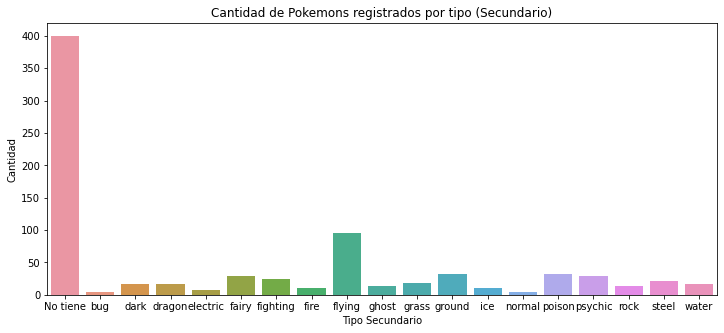

tipo2
No tiene    400
bug           5
dark         17
dragon       17
electric      8
fairy        29
fighting     25
fire         11
flying       95
ghost        14
grass        19
ground       32
ice          11
normal        4
poison       32
psychic      29
rock         14
steel        22
water        17
Name: tipo2, dtype: int64


In [ ]:
plt.figure(figsize=(12,5))
type2valores= pokemon_ds.groupby('tipo2').tipo2.count()
plt.title("Cantidad de Pokemons registrados por tipo (Secundario)")
g = sns.barplot(x=type2valores.index, y=type2valores, )
g.set_xlabel('Tipo Secundario')
g.set_ylabel('Cantidad')
plt.show()

print(pokemon_ds.groupby('tipo2').tipo2.count())

Respecto del tipo secundario, la distribución es aun mas heterogenea. Mientras que casi la mitad de los pokemon no tienen tipo secundario, encontramos que hay un tipo secundario que destaca sobre los demas (el tipo volador, con 95 especies pokemon), mientras que todos los demas tipos cuentan con menos de la mitad de ejemplares que el recien mencionado, algunos incluso contando con apenas unos pocos ejemplares, como el tipo normal, con solo 4, y el tipo insecto con apenas 5.

#### Distribución por genero:

Cuando el videojuego genera un pokemon nuevo, su genero dependera de la probabilidad que este asignada a cada especie. Hemos mencionado previamente que los valores posibles son 10 (9 + los pokemon sin genero). Veremos a continuacion cuantas especies pokemon se asignaron a cada una de estas posibilidades.

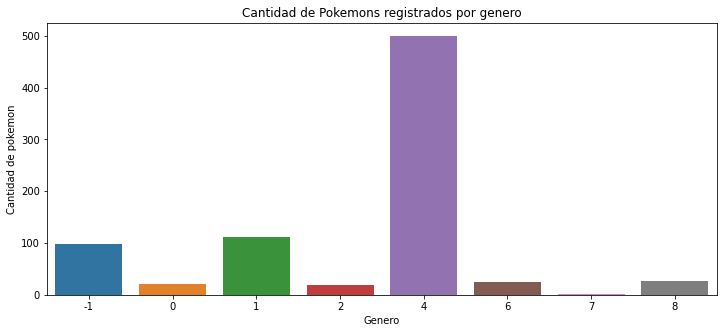

genero
-1     98
 0     20
 1    111
 2     19
 4    500
 6     24
 7      2
 8     27
Name: genero, dtype: int64


In [ ]:
plt.figure(figsize=(12,5))
type1valores= pokemon_ds.groupby('genero').genero.count()
plt.title("Cantidad de Pokemons registrados por genero")
g = sns.barplot(x=type1valores.index, y=type1valores, )
g.set_xlabel('Genero')
g.set_ylabel('Cantidad de pokemon')
plt.show()

print(pokemon_ds.groupby('genero').genero.count())

Podemos observar algunas particularidades en el grafico anterior:
- Mas de la mitad de las especies pokemon tienen 50% de probabilidades de ser de cualquiera de los dos generos
- Dos de las categorias mencionadas (la 3 y la 5) no tienen ningun pokemon, mientras que la 7 tiene tan solo 2 especies
- Para los demas valores posibles la cantidad de especies pokemon asignadas son bajas (alrededor de 20 especies para cada una), con excepcion de la categoria 1, la cual tiene mas de 100 especies.
- La cantidad de especies pokemon que no tienen genero es similar a las especies en la categoria 1, lo cual es 5 veces mayor a las demas categorias (a excepcion de la 7, para con la cual la diferencia es mucho mayor, al igual que, obviamente, para con las categorias 3 y 5); pero apenas 1/5 de la categoria 4 (recordemos, 50%)

### Analisis bivariado

En el próximo grafico analizaremos la relación entre el peso y la altura de los pokémons, con el objetivo de determinar si estos valores guardan alguna coherencia entre si (si hay equilibrio):

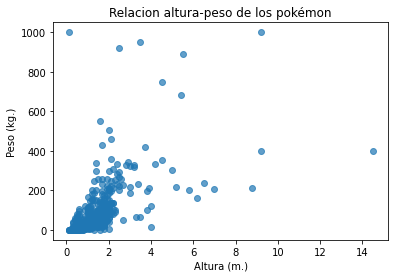

In [ ]:
 #scatterplot
fig, ax = plt.subplots()
alturas = pokemon_ds["altura_m"]
pesos = pokemon_ds["peso_kg"]
ax.scatter(alturas, pesos, alpha=0.7)
ax.set_title("Relacion altura-peso de los pokémon")
ax.set_xlabel("Altura (m.)")
ax.set_ylabel("Peso (kg.)")
plt.show()

####  Tendencia general:
De la lectura del gráfico de dispersión de puede concluir que hay una tendencia general al equilibrio entre altura y peso, que además, se mantiene dentro de margenes que serian considerados relativamente normales para animales del mundo real (menos de 4 metros de altura, y menos de 500 kilos). 

####  Pokémon tipicos / atipicos
Se observa, sin embargo, en el grafico anterior, algunos pokémon que exceden los margenes mencionados. Nos referiremos a aquellos que se encuadran dentro de la tendencia general como "tipicos", mientras que aquellos que exceden las medidas que serían consideradas "normales" en un animal del mundo real, seran llamados "atipicos". Procedemos a identificarlos en la siguiente tabla:

In [ ]:
pokemonsatipicos1 = pokemon_ds.loc[pokemon_ds.altura_m > 4]
pokemonsatipicos2 = pokemon_ds.loc[pokemon_ds.peso_kg > 500]

pokemonsatipicos = pd.concat([pokemonsatipicos1,pokemonsatipicos2])
pokemonsatipicos.drop_duplicates(inplace=True)
pokemonsatipicos.iloc[:][['nombre','altura_m','peso_kg']]

,nombre,altura_m,peso_kg
94,onix,8.8,210.0
129,gyarados,6.5,235.0
207,steelix,9.2,400.0
248,lugia,5.2,216.0
320,wailord,14.5,398.0
349,milotic,6.2,162.0
381,kyogre,4.5,352.0
383,rayquaza,7.0,206.5
482,dialga,5.4,683.0
483,palkia,4.2,336.0


**Pokémons atipicos "equilibrados" y "desequilibrados":**

La tabla anterior identifica los pokémons que exceden los margenes "normales" de peso y tamaño. A continuacion discriminaremos estos en dos categorias:

**Equilibrados**

Exceden ambos margenes, es decir, son en exceso pesados, pero también son gigantes.

**Desequilibrados:**

Exceden solo un margen, es decir, son gigantes y no tan pesados como se esperaría, o bien pesan demasiado para su tamaño.

In [ ]:
pokemonsequilibrados = pokemonsatipicos1.loc[pokemon_ds.peso_kg > 500]

pokemonsequilibrados.iloc[:][['nombre']]

pokemonsdesequilibrados1 = pokemonsatipicos1.loc[pokemon_ds.peso_kg <= 500]
pokemonsdesequilibrados2 = pokemonsatipicos2.loc[pokemon_ds.altura_m <= 4]
pokemonsdesequilibrados = pd.concat([pokemonsdesequilibrados1,pokemonsdesequilibrados2])


In [ ]:
equilibrados = [pokemonsequilibrados.nombre[i] for i in pokemonsequilibrados.index]
print('''Lista de pokemons equilibrados: 
''', equilibrados)

Lista de pokemons equilibrados: 
 ['dialga', 'giratina-altered', 'celesteela', 'guzzlord']


In [ ]:
desequilibrados = [pokemonsdesequilibrados.nombre[i] for i in pokemonsdesequilibrados.index]
print('''Lista de pokemons desequilibrados: 
''', desequilibrados)

Lista de pokemons desequilibrados: 
 ['onix', 'gyarados', 'steelix', 'lugia', 'wailord', 'milotic', 'kyogre', 'rayquaza', 'palkia', 'yveltal', 'zygarde-50', 'metagross', 'groudon', 'avalugg', 'mudsdale', 'cosmoem']


####Buscando relación entre el peso, el tamaño, y los stats

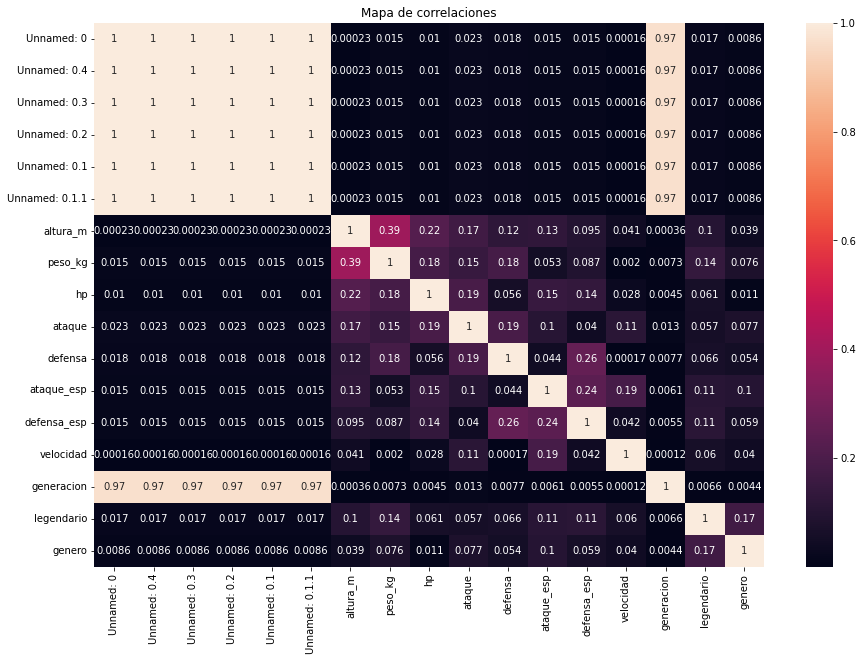

In [ ]:
plt.figure(figsize = (15,10))

sns.heatmap(pokemon_ds.corr() ** 2, annot=True)
plt.title('Mapa de correlaciones')

plt.show()

Como podemos observar, utilizando el coeficiente R2, no parece haber una correlación lineal entre ningun valor, salvo entre "peso" y "altura", que, tal como vimos en el apartado anterior, salvo excepciones, la relación resulta bastante evidente. 

En el proximo apartado prepararemos los datos categoricos para poder ser procesados por el modelo de inteligencia artificial, añadiremos información sobre combates pokemon, e intentaremos determinar que modelo (y con que datos debe ser entrenado el mismo) puede predecir con mayor eficacia el vencedor de un combate

# 3. Machine Learning

Ahora procederemos con la elaboración de varios modelos de Machine Learning. Evaluaremos sus metricas, y luego estudiaremos formas de mejorar aquel que consideremos mas adecuado

## 3.1 Preparación de los datos

Procedemos a cargar los datos de combates y realizar las transformaciones necesarias para poder utilizarlos para entrenar los diversos modelos

In [ ]:
combat = pd.read_csv('/content/drive/MyDrive/Data Science - Equipo: Zelada, Caceres M., Rodriguez S./Segunda Pre-Entrega/combats.csv')

In [ ]:
pokemon_st = pokemon_ds
# pokemon_st.drop('nombre', inplace = True, axis = 1)
# pokemon_st.drop(['tipo1','tipo2'], inplace = True, axis = 1)
# pokemon_st.drop(['Unnamed: 0', 'Unnamed: 0.4', 'Unnamed: 0.3',	'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], inplace=True, axis = 1)
pokemon_st.head()

,Unnamed: 0,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0.1.1,pokedex_id,nombre,tipo1,tipo2,altura_m,peso_kg,hp,ataque,defensa,ataque_esp,defensa_esp,velocidad,generacion,legendario,genero
0,0,0,0,0,0,0,1,bulbasaur,grass,poison,0.7,6.9,45,49,49,65,65,45,1,0,1
1,1,1,1,1,1,1,2,ivysaur,grass,poison,1.0,13.0,60,62,63,80,80,60,1,0,1
2,2,2,2,2,2,2,3,venusaur,grass,poison,2.0,100.0,80,82,83,100,100,80,1,0,1
3,3,3,3,3,3,3,4,charmander,fire,No tiene,0.6,8.5,39,52,43,60,50,65,1,0,1
4,4,4,4,4,4,4,5,charmeleon,fire,No tiene,1.1,19.0,58,64,58,80,65,80,1,0,1


Cada pokémon tiene sus respectivos stats. Si tomamos un pokémon cualquiera, y seleccionamos un rival al azar, las probabilidades de que el rival sea de la misma especie pokémon es de 1/801. Teniendo en cuenta que en cada uno de los miles de combates restantes, se enfrentan a dos pokémon diferentes, nos preguntamos como podríamos introducir esta información en el modelo de la forma mas eficiente posible.

La siguiente celda de codigo responde a esa necesidad, generando un nuevo dataframe donde se contiene la siguiente información:

Primer contendiente pokémon
Segundo contendiente pokémon
Diferencia en puntos de ataque
Diferencia en puntos de defensa
Diferencia en puntos de ataque especial
Diferencia en puntos de defensa especial
Diferencia en puntos de vida
Diferencia en puntos de velocidad
Ganador del combate

**Aclaraciones:** Las diferencias en los puntos estan representados a favor del primer pokémon. Así, cuando la diferencia es negativa, se entiende que la diferencia es, al pasarlo a valores absolutos, a favor del segundo pokemon.
Respecto de la columna que identifica al ganador del combate, la información de la misma esta expresada en valores binarios, significando "0" que el primer pokemon es el ganador, mientras que "1" indica que lo es el segundo. Esto se hizo originalmente para elaborar diagramas de dispersión, sin embargo se observo que los modelos se comportaban mejor de esta forma.

In [ ]:
difaltura_m = []
for i in range(len(combat.Winner)):
  difaltura_m.append(pokemon_st.altura_m[combat.First_pokemon[i]] - pokemon_st.altura_m[combat.Second_pokemon[i]])

difpeso_kg = []
for i in range(len(combat.Winner)):
  difpeso_kg.append(pokemon_st.peso_kg[combat.First_pokemon[i]] - pokemon_st.peso_kg[combat.Second_pokemon[i]])

difhp = []
for i in range(len(combat.Winner)):
  difhp.append(pokemon_st.hp[combat.First_pokemon[i]] - pokemon_st.hp[combat.Second_pokemon[i]])

difataque = []
for i in range(len(combat.Winner)):
  difataque.append(pokemon_st.ataque[combat.First_pokemon[i]] - pokemon_st.ataque[combat.Second_pokemon[i]])

difdefensa = []
for i in range(len(combat.Winner)):
  difdefensa.append(pokemon_st.defensa[combat.First_pokemon[i]] - pokemon_st.defensa[combat.Second_pokemon[i]])

difataque_esp = []
for i in range(len(combat.Winner)):
  difataque_esp.append(pokemon_st.ataque_esp[combat.First_pokemon[i]] - pokemon_st.ataque_esp[combat.Second_pokemon[i]])

difdefensa_esp = []
for i in range(len(combat.Winner)):
  difdefensa_esp.append(pokemon_st.defensa_esp[combat.First_pokemon[i]] - pokemon_st.defensa_esp[combat.Second_pokemon[i]])

difvelocidad = []
for i in range(len(combat.Winner)):
  difvelocidad.append(pokemon_st.velocidad[combat.First_pokemon[i]] - pokemon_st.velocidad[combat.Second_pokemon[i]])


combat['difaltura_m'] = difaltura_m
combat['difpeso_kg'] = difpeso_kg
combat['difhp'] = difhp
combat['difataque'] = difataque
combat['difdefensa'] = difdefensa
combat['difataque_esp'] = difataque_esp
combat['difdefensa_esp'] = difdefensa_esp
combat['difvelocidad'] = difvelocidad


binwin = []

for i in range(len(combat.Winner)):
  if combat.Winner[i] == combat.First_pokemon[i]:
    binwin.append(0)
  elif combat.Winner[i] == combat.Second_pokemon[i]:
    binwin.append(1)
  else:
    binwin.append(np.nan)

combat['binwin'] = binwin

combat.head()

,First_pokemon,Second_pokemon,Winner,difaltura_m,difpeso_kg,difhp,difataque,difdefensa,difataque_esp,difdefensa_esp,difvelocidad,binwin
0,266,298,298,0.0,-68.6,30,25,-85,55,-40,35,1
1,702,701,701,0.1,3.5,-17,-8,93,-31,83,-51,1
2,191,668,668,0.7,8.4,31,37,16,44,6,-12,1
3,237,683,683,0.0,2.5,-17,-18,-51,26,8,16,1
4,151,231,151,-0.2,-113.6,-45,-71,-55,-11,5,-5,0


In [ ]:
combat.binwin.value_counts()

1    26399
0    23601
Name: binwin, dtype: int64

In [ ]:
columnas1 = combat.columns.tolist()[:]
columnas1


['First_pokemon',
 'Second_pokemon',
 'Winner',
 'difaltura_m',
 'difpeso_kg',
 'difhp',
 'difataque',
 'difdefensa',
 'difataque_esp',
 'difdefensa_esp',
 'difvelocidad',
 'binwin']

In [ ]:
combat.head()

,First_pokemon,Second_pokemon,Winner,difaltura_m,difpeso_kg,difhp,difataque,difdefensa,difataque_esp,difdefensa_esp,difvelocidad,binwin
0,266,298,298,0.0,-68.6,30,25,-85,55,-40,35,1
1,702,701,701,0.1,3.5,-17,-8,93,-31,83,-51,1
2,191,668,668,0.7,8.4,31,37,16,44,6,-12,1
3,237,683,683,0.0,2.5,-17,-18,-51,26,8,16,1
4,151,231,151,-0.2,-113.6,-45,-71,-55,-11,5,-5,0


## 3.2 Regresión Logística

In [ ]:
from sklearn import metrics
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import f1_score
# from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
y = combat.binwin
combat_features = ['First_pokemon', 'Second_pokemon', 'difhp', 'difataque', 'difdefensa', 'difataque_esp', 'difdefensa_esp', 'difvelocidad']
X = combat[combat_features]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=33,
                                                    stratify= y)


print('Tamaño del set de entrenamiento:', X_train.shape)
print('Tamaño del set de testeo:', X_test.shape)


Tamaño del set de entrenamiento: (40000, 8)
Tamaño del set de testeo: (10000, 8)


In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [ ]:
print('Matriz de confusion:')
print(metrics.confusion_matrix(y_test, y_pred))
print('Classification report:',metrics.classification_report(y_test,y_pred))
print('-----------------------------------------------------------------------------')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Precision:',metrics.precision_score(y_test, y_pred))
print('Recall:',metrics.recall_score(y_test, y_pred))
print('F1:',metrics.f1_score(y_test, y_pred))

Matriz de confusion:
[[1209 3511]
 [1162 4118]]
Classification report:               precision    recall  f1-score   support

           0       0.51      0.26      0.34      4720
           1       0.54      0.78      0.64      5280

    accuracy                           0.53     10000
   macro avg       0.52      0.52      0.49     10000
weighted avg       0.53      0.53      0.50     10000

-----------------------------------------------------------------------------
Accuracy: 0.5327
Precision: 0.539782409227946
Recall: 0.7799242424242424
F1: 0.6380044929893872


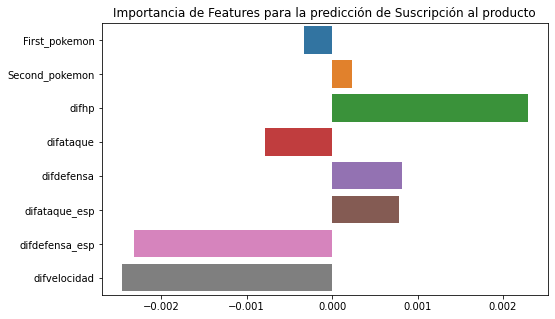

In [ ]:
plt.figure(figsize=(8,5))

values = pd.Series(clf.coef_.flat)  

sns.barplot(y=X.columns,
            x=values,
           ).set(title='Importancia de Features para la predicción de Suscripción al producto')

plt.show()

## 3.3 KNN

In [ ]:
combat.sample(10)

,First_pokemon,Second_pokemon,Winner,difaltura_m,difpeso_kg,difhp,difataque,difdefensa,difataque_esp,difdefensa_esp,difvelocidad,binwin
35796,458,343,343,-0.5,-57.5,0,-8,-55,-8,-60,-35,1
38632,124,690,124,-0.7,-51.5,0,8,-33,-2,-38,61,0
20180,416,488,488,0.0,0.8,-20,-35,-10,-35,10,15,1
21969,345,436,345,0.2,-126.6,19,-8,-19,2,-9,10,0
19740,319,544,544,-0.5,-70.5,70,-30,-54,15,-34,-52,1
1446,1,766,766,0.5,1.0,35,27,23,60,50,-20,1
44654,154,555,154,-0.5,-20.1,-36,-34,-24,-46,-17,5,0
38682,737,435,737,1.0,-15.5,20,46,4,121,-11,20,0
8258,733,719,719,-0.1,-3.0,-32,-40,-30,-120,-100,-25,1
16003,384,142,142,-1.8,-458.9,-60,-10,35,35,-10,70,1


In [ ]:
knncombat = combat.copy(deep=True)

knncombat.drop('Winner', inplace=True, axis = 1)
knncombat.head(10)

,First_pokemon,Second_pokemon,difaltura_m,difpeso_kg,difhp,difataque,difdefensa,difataque_esp,difdefensa_esp,difvelocidad,binwin
0,266,298,0.0,-68.6,30,25,-85,55,-40,35,1
1,702,701,0.1,3.5,-17,-8,93,-31,83,-51,1
2,191,668,0.7,8.4,31,37,16,44,6,-12,1
3,237,683,0.0,2.5,-17,-18,-51,26,8,16,1
4,151,231,-0.2,-113.6,-45,-71,-55,-11,5,-5,0
5,657,752,1.2,38.5,32,40,32,53,36,87,0
6,192,134,0.4,13.5,0,0,-15,-35,-50,-35,1
7,73,545,0.1,19.4,0,53,40,-7,-20,-46,1
8,220,763,1.0,55.5,49,48,-10,-22,-50,-50,1
9,302,31,0.1,2.5,4,28,45,15,15,0,1


In [ ]:
knncombat.binwin.value_counts()

1    26399
0    23601
Name: binwin, dtype: int64

Buscamos posibles tendencias que justifiquen el uso del KNN

In [ ]:
knncol = knncombat.columns
print(knncol.drop(['First_pokemon','Second_pokemon','binwin']))

Index(['difaltura_m', 'difpeso_kg', 'difhp', 'difataque', 'difdefensa',
       'difataque_esp', 'difdefensa_esp', 'difvelocidad'],
      dtype='object')


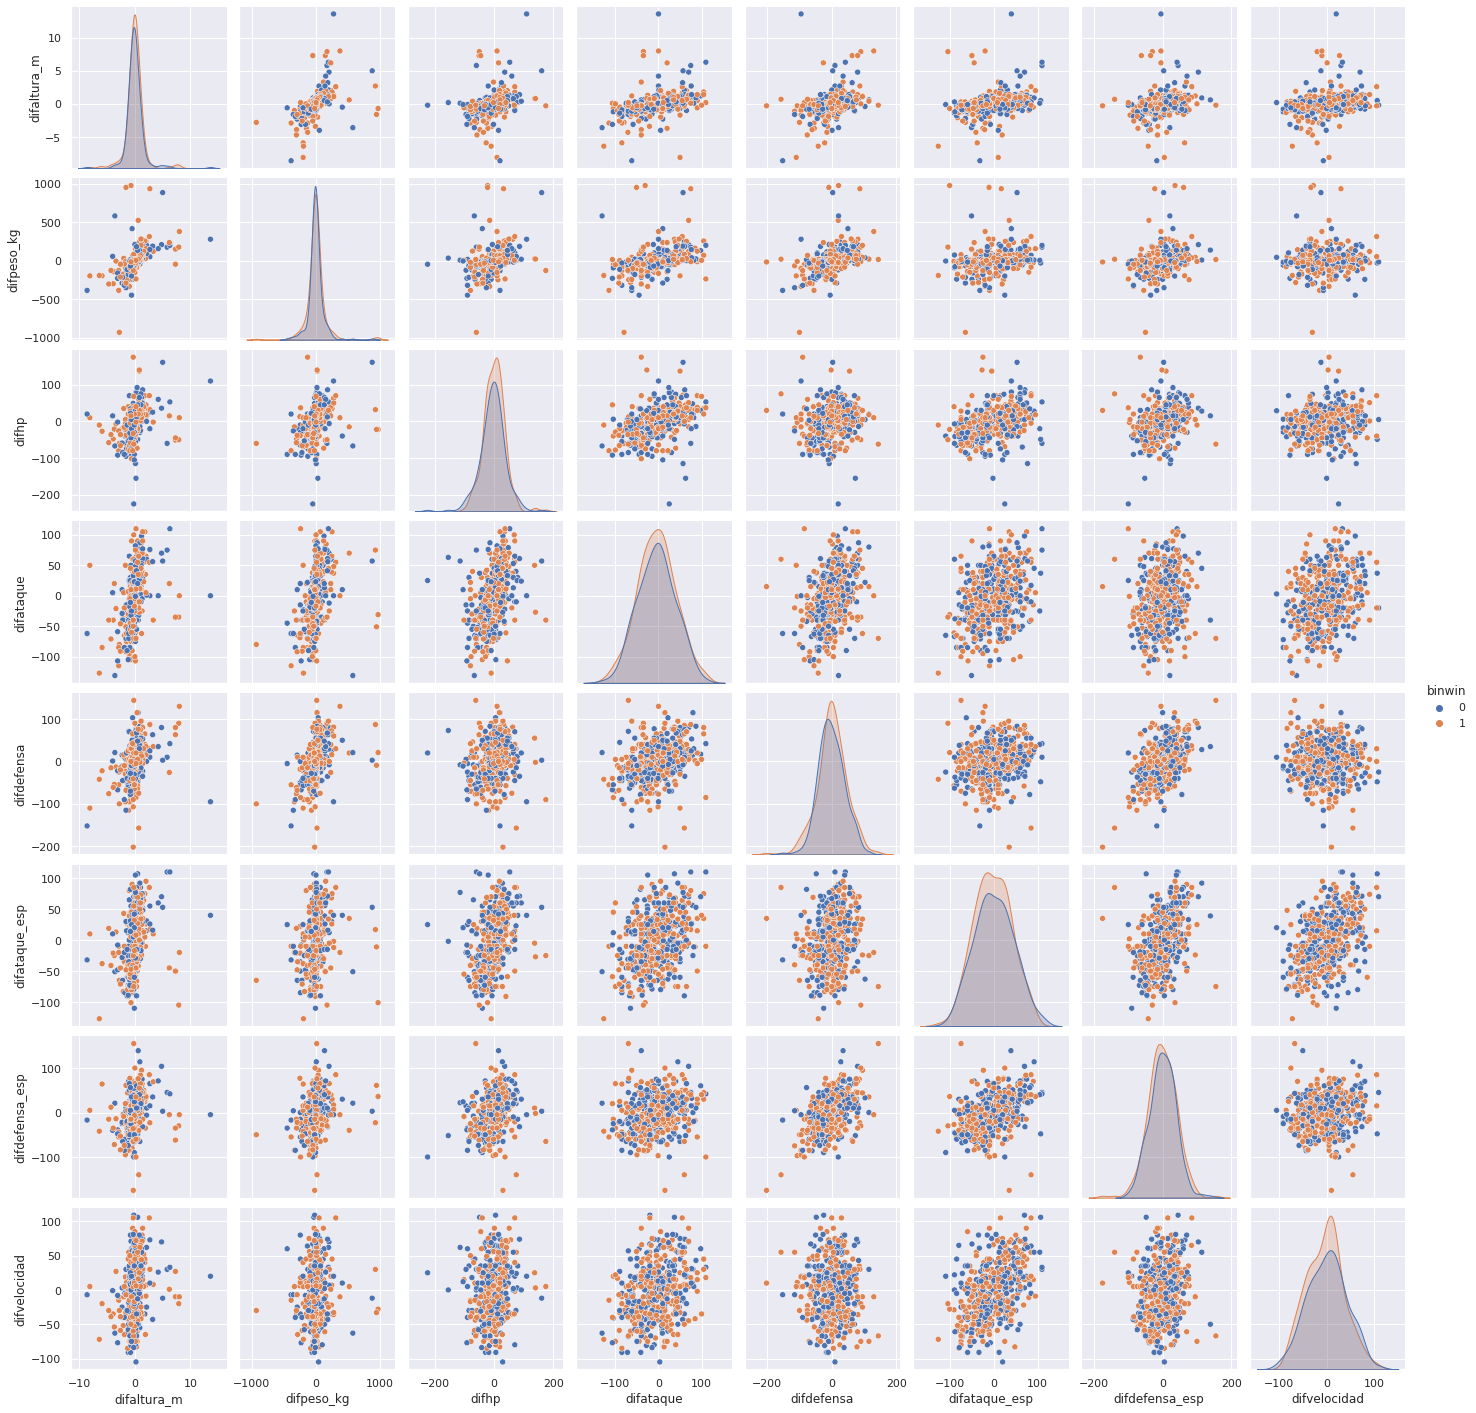

In [ ]:
sns.set()

        
sns.pairplot(knncombat.sample(500),
             x_vars=knncol.drop(['First_pokemon','Second_pokemon','binwin']),
             y_vars=knncol.drop(['First_pokemon','Second_pokemon','binwin']),
             hue= 'binwin')

plt.show()

La distribución parece demasiado homogenea para utilizar un algoritmo de este tipo. De hecho, en una versión anterior de este trabajo ensayamos un modelo utilizando este dataframe para entrenarlo, y cuyo accuracy no supero en ningun caso el 0.30
Sin embargo, nos preguntamos como afectarían las diferencias en las estadisticas en su conjunto. Se nos ocurrió para ello crear una nueva columna, en la cual dichos valores se sumen, para luego buscar una relación entre este valor resultante, y el ganador del combate:

In [ ]:
totaldif = []

for i in range(len(combat.Winner)):
  a = 0
  for j in knncol.drop(['First_pokemon','Second_pokemon','binwin']):
    a = a+ combat.loc[i][j]
    
  totaldif.append(a)


combat['totaldif'] = totaldif
knncombat['totaldif'] = totaldif

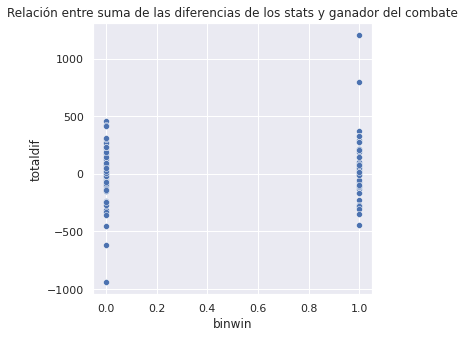

In [ ]:
plt.figure(figsize = (5,5))

plt.subplot(1,1,1)
sns.scatterplot(data = knncombat.sample(100), y = 'totaldif', x= 'binwin')
plt.title('Relación entre suma de las diferencias de los stats y ganador del combate')

plt.show()

In [ ]:
y = knncombat.binwin
combat_features = ['totaldif']
X = combat[combat_features]


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=33,
                                                    stratify= y)


print('Tamaño del set de entrenamiento:', X_train.shape)
print('Tamaño del set de testeo:', X_test.shape)

Tamaño del set de entrenamiento: (40000, 1)
Tamaño del set de testeo: (10000, 1)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1) #instanciar el objeto como primer paso
neigh.fit(X_train, y_train) #Paso2: Ajustar con los datos

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = neigh.predict(X_test) #Prediccion con datos 
y_pred_train = neigh.predict(X_train) #Prediccion con datos de entrenamiento

In [ ]:
print('Matriz de confusion:')
print(metrics.confusion_matrix(y_test, y_pred))
print('Classification report:',metrics.classification_report(y_test,y_pred))
print('-----------------------------------------------------------------------------')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Precision:',metrics.precision_score(y_test, y_pred))
print('Recall:',metrics.recall_score(y_test, y_pred))
print('F1:',metrics.f1_score(y_test, y_pred))

Matriz de confusion:
[[2297 2423]
 [2498 2782]]
Classification report:               precision    recall  f1-score   support

           0       0.48      0.49      0.48      4720
           1       0.53      0.53      0.53      5280

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.51      0.51     10000

-----------------------------------------------------------------------------
Accuracy: 0.5079
Precision: 0.5344860710854947
Recall: 0.5268939393939394
F1: 0.5306628516928946


El accuracy del modelo actualmente resulta ampliamente mas elevado que el anterior (0.30)
No obstante, sigue siendo inferior al obtenido con la regresión logística. Ensayaremos un tercer modelo antes de tomar determinaciones al respecto.

## 3.4 Random Forest

In [ ]:
y = combat.binwin
combat_features = ['First_pokemon', 'Second_pokemon', 'difhp', 'difataque', 'difdefensa', 'difataque_esp', 'difdefensa_esp', 'difvelocidad']
X = combat[combat_features]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=33,
                                                    stratify= y)


print('Tamaño del set de entrenamiento:', X_train.shape)
print('Tamaño del set de testeo:', X_test.shape)


Tamaño del set de entrenamiento: (40000, 8)
Tamaño del set de testeo: (10000, 8)


In [ ]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [ ]:
predictions = forest_model.predict(X_test)

In [ ]:
print(predictions)

[0.12 0.23 0.5  ... 0.85 0.65 0.8 ]


In [ ]:
predictionsint = []

for i in range(len(predictions)):
  if int(predictions[i]) - X_test.First_pokemon[X_test.index[i]] > int(predictions[i]) - X_test.Second_pokemon[X_test.index[i]]:
    predictionsint.append(X_test.First_pokemon[X_test.index[i]])
  else:
    predictionsint.append(X_test.Second_pokemon[X_test.index[i]])

print(predictionsint)

[164, 566, 174, 116, 210, 100, 36, 259, 283, 300, 370, 363, 483, 458, 34, 55, 281, 451, 212, 73, 128, 37, 37, 110, 151, 426, 373, 301, 312, 1, 328, 129, 187, 701, 71, 229, 272, 276, 292, 182, 454, 704, 162, 727, 206, 274, 175, 601, 61, 69, 293, 49, 391, 64, 215, 134, 113, 232, 14, 206, 383, 11, 281, 393, 127, 403, 477, 47, 206, 39, 226, 65, 139, 128, 177, 291, 656, 210, 469, 403, 89, 596, 31, 586, 255, 68, 344, 221, 119, 473, 270, 690, 763, 39, 95, 571, 38, 103, 439, 29, 112, 399, 140, 410, 672, 123, 483, 543, 345, 435, 391, 17, 38, 202, 420, 636, 166, 563, 288, 465, 18, 467, 222, 635, 560, 24, 31, 224, 552, 225, 19, 11, 76, 317, 107, 460, 267, 154, 314, 122, 56, 334, 73, 110, 323, 124, 329, 92, 107, 109, 11, 386, 248, 573, 248, 79, 504, 293, 627, 551, 454, 468, 555, 467, 435, 466, 40, 240, 482, 26, 296, 318, 25, 545, 25, 123, 205, 362, 79, 299, 558, 724, 268, 124, 477, 375, 356, 189, 288, 55, 565, 495, 171, 356, 720, 700, 167, 125, 233, 277, 134, 661, 576, 356, 161, 36, 113, 95, 11, 5

In [ ]:
results = X_test.copy(deep=True)
results.drop(['difhp', 'difataque', 'difdefensa', 'difataque_esp', 'difdefensa_esp',
 'difvelocidad'], inplace = True, axis = 1)
results['prediction'] = predictionsint
results.sample(10)

,First_pokemon,Second_pokemon,prediction
33499,581,118,118
26132,799,255,255
41454,512,21,21
4174,697,730,697
2148,729,552,552
33488,15,100,15
27665,175,305,175
9073,596,693,596
44484,764,497,497
45325,654,54,54


In [ ]:
import numpy as np

y_pred = []

for i in predictions:
  if i >= 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

print(np.array(y_pred))

[0 0 1 ... 1 1 1]


In [ ]:
print('Matriz de confusion:')
print(metrics.confusion_matrix(y_test, y_pred))
print('Classification report:')
print(metrics.classification_report(y_test,y_pred))
print('-----------------------------------------------------------------------------')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Precision:',metrics.precision_score(y_test, y_pred))
print('Recall:',metrics.recall_score(y_test, y_pred))
print('F1:',metrics.f1_score(y_test, y_pred))

Matriz de confusion:
[[3173 1547]
 [1353 3927]]
Classification report:
              precision    recall  f1-score   support

           0       0.70      0.67      0.69      4720
           1       0.72      0.74      0.73      5280

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

-----------------------------------------------------------------------------
Accuracy: 0.71
Precision: 0.717391304347826
Recall: 0.74375
F1: 0.7303328993862749


## Eleccion del modelo:

Independientemente de la metrica escogida, es evidente que el ultimo modelo es, por el momento, el mas preciso. Antes de avanzar queremos profundizar en dos cuestiones:
 

En primer lugar, dada la naturaleza de nuestros datos, se podría argumentar que no hay una diferencia esencial entre "falsos positivos y falsos negativos". Para entender esto debemos comprender como funciona nuestro modelo:

Ciertamente, podríamos argumentar que, para nuestros fines, que el modelo nos prediga erroneamente que saldremos vencedores de un combate podría ser catastrofico, pues, podríamos correr el riesgo de no ir al mismo lo suficientemente preparados. En contraparte, que un modelo nos prediga erroneamente perdedores solo puede acrecentar nuestras probabilidades de ganar.

No obstante, el input que nuestro modelo recibe esta compuesto por la diferencia de stats entre dos pokémon. El modelo predice, como valor de salida, cual pokemon saldrá victorioso del encuentro. Nuestro modelo no sabe, ni tiene forma de discriminar cual de los dos contendientes se corresponde con nosotros.

Además, suponemos (pues, el modelo no deja de ser una caja negra) que el modelo no hace diferencia entre el primer y el segundo pokemon solo por el hecho de estar en uno u otro lugar. 

Esta hipotesis podría ser puesta a prueba de forma sencilla, por lo cual seguramente lo haremos mas adelante.

Por lo recien mencionado entendemos que la métrica a la cual debemos prestar mas atención es el **F1-Score**, por lo cual será esa la métrica que utilizaremos en lo sucesivo para evaluar el modelo


En segundo lugar, los tres modelos construidos son apenas ensayos. Entendemos que las métricas pueden ser mejoradas de diferentes formas. No obstante, creemos que la diferencia entre el ultimo modelo y los dos anteriores es lo suficientemente amplia como para enfocarnos en mejorar el ultimo modelo, y dejar los dos anteriores momentaneamente de lado. Quizás en una versión futura de este trabajo alguno de dichos dos modelos pueda ser retomado y llevado a buen puerto.